 ========= my Newton-Raphson scheme with your proposed step :-)
(' Estimated error  2.65e-01 at iteration 1 : ', array([0.87997904, 1.73598008]))
(' Estimated error  2.48e-02 at iteration 2 : ', array([0.85723809, 1.74589495]))
(' Estimated error  1.82e-04 at iteration 3 : ', array([0.85721271, 1.74607507]))
(' Estimated error  2.14e-08 at iteration 4 : ', array([0.85721269, 1.74607506]))
(' Estimated error  4.58e-16 at iteration 5 : ', array([0.85721269, 1.74607506]))
 Computed distance is :      2.603288 
 ========= your full computation :-)
(' Estimated error  2.61e+00 at iteration 1 : ', array([1.75, 3.5 ]))
(' Estimated error  8.42e-01 at iteration 2 : ', array([1.38068976, 2.74339944]))
(' Estimated error  5.83e-01 at iteration 3 : ', array([1.15426979, 2.20643741]))
(' Estimated error  3.60e-01 at iteration 4 : ', array([0.88280674, 1.96925834]))
(' Estimated error  1.97e-01 at iteration 5 : ', array([0.88400047, 1.77223857]))
(' Estimated error  3.60e-02 at iteration 6 : ', arr

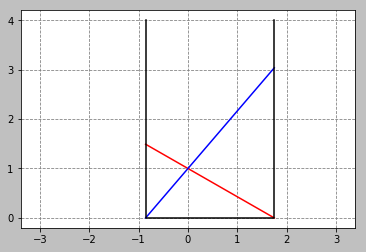

In [75]:
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from scipy.linalg import norm
from scipy.linalg import solve

def laddersIterate(geometry, v):
    a= geometry[0]; b = geometry[1]; c = geometry[2]; y = v[1]; x = v[0]
    f1 = a**2 * x**2 - (x**2 + c**2)*(x+y)**2
    f2 = b**2 * y**2 - (y**2 + c**2)*(x+y)**2
    df1dx = 2*a**2*x - 2*(x+y)*(x**2 + c**2) - 2*x*(x+y)**2
    df1dy = -2*(x+y)*(x**2 + c**2)
    df2dx = -2*(y**2 + c**2)*(x+y)
    df2dy = 2* b**2 *y -2*(x+y)*(y**2 +c**2) - 2 * y* (x+y)**2
    jacc_matrix = [[df1dx, df1dy], [df2dx, df2dy]]
    b = [f1,f2]
    dx = solve(jacc_matrix, b)
    v =  v - dx 
    return v
    
def laddersSolve(geometry,tol,nmax):
    a= geometry[0]; b = geometry[1]; c = geometry[2]
    if a==b and c ==b:
        return [-1,-1]
    delta = tol+1
    n = 0
    x = [(b-c)/2,(a-c)/2]
    while (norm(delta) > tol and n < nmax):
        xold = x
        x = laddersIterate(geometry,xold)
        delta = x-xold; n = n+1
        print(" Estimated error %9.2e at iteration %d : " % (norm(delta),n),x)
    return x

 
geometry = [4,3,1]
print(" ========= my Newton-Raphson scheme with your proposed step :-)")
 
x = array([1.0,1.5]); tol = 10e-12; nmax = 50
n = 0; delta = tol+1
while (norm(delta) > tol and n < nmax):
    xold = x
    x = laddersIterate(geometry,xold)
    delta = x-xold; n = n+1
    print(" Estimated error %9.2e at iteration %d : " % (norm(delta),n),x)
print(" Computed distance is : %13.6f " % sum(x))
 
 
print(" ========= your full computation :-)")
sol = laddersSolve(geometry,1e-14,50)
print(" Computed distance is : %13.6f " % sum(sol))
 
a = geometry[0]
b = geometry[1]
c = geometry[2]
ab = max(a,b)
 
#
# -2- Et un joli dessin
#
 

matplotlib.rcParams['toolbar'] = 'None'
plt.rcParams['figure.facecolor'] = 'silver'
 
plt.figure("Ladders geometry")
x = sol[0]; y = sol[1]; d = x + y
hx = sqrt(b*b - d*d); hy = sqrt(a*a - d*d)
plt.plot([-x,y],[hx,0],'-r')
plt.plot([-x,y],[0,hy],'-b')
plt.plot([-x,-x,y,y],[ab,0,0,ab],'k')
plt.axis('equal')
ax = plt.gca()
ax.yaxis.grid(color='gray',linestyle='dashed')
ax.xaxis.grid(color='gray',linestyle='dashed')
plt.xticks(arange(-ab,ab+1,1))
plt.yticks(arange(0,ab+1,1))
plt.show()